In [1]:
pip install pmdarima

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install --upgrade statsmodels

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [165]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import joblib
from matplotlib import font_manager

In [5]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [6]:
pip install sqlalchemy

Note: you may need to restart the kernel to use updated packages.


In [7]:
#CONNECTING TO NEON

In [2]:
pip install psycopg2-binary

In [3]:
import pandas as pd
from sqlalchemy import create_engine

In [4]:
db_params = {
    'host': 'ep-purple-queen-a1zvv634.ap-southeast-1.aws.neon.tech',
    'database': 'skeeperai',
    'user': 'skeeperai_owner',
    'password': 'keCZpiao4XY0',
    'port': '5432'
}
engine = create_engine(f'postgresql://{db_params['user']}:{db_params['password']}@{db_params['host']}:{db_params['port']}/{db_params['database']}')

In [5]:
query = "select * from work_orders;"

In [6]:
db = pd.read_sql_query(query, engine)
db

,wo_no,customer,customer_product_details,wo_date,machine_ordertype,area_or_del,regional_location,cooler,product_width,product_length,...,hard,soft,hard2,s_soft,add3waste,core76x4mtr,wo_month,status,material_list,out_qty
0,33667,Reem Est.,Reem Chocolate 5c lamination roll,2023-05-14,New,Jeddah,Western,None,15.0,500.0,...,None,0,None,None,None,None,May,Processed,None,NaN
1,35795,AL RASHEEDI PLASTIC,CPP+Polyester Plain Lamination roll,2024-03-04,new,Riyadh,Western,None,44.0,500.0,...,None,0,None,None,None,None,Riyadh,Processed,None,NaN
2,32713,Knoz Al Oud,BOPP PLAIN TRANSPARENT SEALABLE,2023-01-09,New,Jeddah,Western,None,30.0,1000.0,...,None,0,None,None,None,None,Jan,Processed,None,NaN
3,32651,Hani Trading,BOPP TRANSPARENT SEALABLE,2023-01-01,Repeat,Jeddah,Western,None,35.0,1200.0,...,None,0,None,None,None,None,Jan,Processed,None,NaN
4,32714,Knoz Al Oud,BOPP PLAIN TRANSPARENT SEALABLE,2023-01-09,New,Jeddah,Western,None,30.5,1000.0,...,None,0,None,None,None,None,Jan,Processed,None,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1263,36156,Integrated Product Corporation,BOPP TRANSPARENT SEALABLE,2024-04-20,Repeat,Jeddah,Western,None,28.0,1060.0,...,None,0,None,None,None,None,Jeddah,Processed,None,NaN
1264,36157,Integrated Product Corporation,BOPP TRANSPARENT SEALABLE,2024-04-20,Repeat,Jeddah,Western,None,32.0,910.0,...,None,0,None,None,None,None,Jeddah,Processed,None,NaN
1265,36159,Al Nahal Al Jwal,Plain high shrink roll,2024-04-20,new,Jeddah,Western,None,7.4,500.0,...,None,None,None,None,None,None,Jeddah,Processed,None,NaN
1266,36161,Renaz's Bakery,BOPP 1c printed Renaz cookies,2024-04-20,Repeat,Makkah,Western,N-1303,20.0,1480.0,...,None,0,None,None,None,None,Makkah,Processed,None,NaN


In [13]:
db.columns

Index(['wo_no', 'customer', 'customer_product_details', 'wo_date',
       'machine_ordertype', 'area_or_del', 'regional_location', 'cooler',
       'product_width', 'product_length', 'micron', 'width_shrink',
       'length_shrink', 'material_1', 'material_2', 'material_1_kg',
       'material_2_kg', 'item_code', 'material_type', 'order_in_rolls',
       'order_in_pcs', 'order_in_kg', 'remarks_curve', 'customer_po', 'unit',
       'no_of_printing_colors', 'pantone_nos', 'printing_method', 'lamination',
       'rewinding_method', 'customer_packing_method', 'core_id_mm',
       'roll_od_cm', 'roll_weight_roll', 'used_material_or_roll_size',
       'packing_carton_size', 'total_weight_needed_kg', 'hard', 'soft',
       'hard2', 's_soft', 'add3waste', 'core76x4mtr', 'wo_month', 'status',
       'material_list', 'out_qty'],
      dtype='object')

In [7]:
import re
db['material_1'].fillna('', inplace = True)

C:\Users\HP\AppData\Local\Temp\ipykernel_20616\1803522716.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  db['material_1'].fillna('', inplace = True)


In [77]:
db4 = db[['wo_date', 'material_1', 'material_1_kg', 'material_2', 'material_2_kg', 'micron']]
db4

,wo_date,material_1,material_1_kg,material_2,material_2_kg,micron
0,2023-05-14,PET 12,57.00,MCPP 30,93.00,42.0
1,2024-03-04,PET 12,26.95,CPP 50,73.05,62.0
2,2023-01-09,BOPP,22.68,None,NaN,30.0
3,2023-01-01,BOPP,283.50,None,NaN,30.0
4,2023-01-09,BOPP,34.02,None,NaN,30.0
...,...,...,...,...,...,...
1263,2024-04-20,BOPP Transparent Heatsealable,NaN,None,NaN,30.0
1264,2024-04-20,BOPP,NaN,None,NaN,30.0
1265,2024-04-20,HS C/S ROLL,NaN,None,NaN,40.0
1266,2024-04-20,BOPP,NaN,None,NaN,30.0


In [9]:
pattern = re.compile('.*BOPP.*')
db_BOPP = db4[db4['material_1'].apply(lambda x: bool(re.match(pattern, str(x))))]
db_BOPP

,wo_date,material_1,material_1_kg,micron
2,2023-01-09,BOPP,22.68,30.0
3,2023-01-01,BOPP,283.50,30.0
4,2023-01-09,BOPP,34.02,30.0
5,2023-01-01,BOPP,17.30,30.0
6,2023-01-01,BOPP,19.40,30.0
...,...,...,...,...
1262,2024-04-18,BOPP,200.00,40.0
1263,2024-04-20,BOPP Transparent Heatsealable,NaN,30.0
1264,2024-04-20,BOPP,NaN,30.0
1266,2024-04-20,BOPP,NaN,30.0


In [10]:
db_BOPP_30 = db_BOPP[db_BOPP['micron'] == 30]
db_BOPP_30

,wo_date,material_1,material_1_kg,micron
2,2023-01-09,BOPP,22.68,30.0
3,2023-01-01,BOPP,283.50,30.0
4,2023-01-09,BOPP,34.02,30.0
5,2023-01-01,BOPP,17.30,30.0
6,2023-01-01,BOPP,19.40,30.0
...,...,...,...,...
1261,2024-04-18,BOPP 4 color printed,200.00,30.0
1263,2024-04-20,BOPP Transparent Heatsealable,NaN,30.0
1264,2024-04-20,BOPP,NaN,30.0
1266,2024-04-20,BOPP,NaN,30.0


In [11]:
db_model_BOPP_30 = db_BOPP_30[['wo_date', 'material_1_kg']]
db_model_BOPP_30

,wo_date,material_1_kg
2,2023-01-09,22.68
3,2023-01-01,283.50
4,2023-01-09,34.02
5,2023-01-01,17.30
6,2023-01-01,19.40
...,...,...
1261,2024-04-18,200.00
1263,2024-04-20,NaN
1264,2024-04-20,NaN
1266,2024-04-20,NaN


In [12]:
db_model_BOPP_30['material_1_kg'] = db_model_BOPP_30['material_1_kg'].fillna(method='ffill')
db_model_BOPP_30

C:\Users\HP\AppData\Local\Temp\ipykernel_20616\3717599300.py:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  db_model_BOPP_30['material_1_kg'] = db_model_BOPP_30['material_1_kg'].fillna(method='ffill')
C:\Users\HP\AppData\Local\Temp\ipykernel_20616\3717599300.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  db_model_BOPP_30['material_1_kg'] = db_model_BOPP_30['material_1_kg'].fillna(method='ffill')


,wo_date,material_1_kg
2,2023-01-09,22.68
3,2023-01-01,283.50
4,2023-01-09,34.02
5,2023-01-01,17.30
6,2023-01-01,19.40
...,...,...
1261,2024-04-18,200.00
1263,2024-04-20,200.00
1264,2024-04-20,200.00
1266,2024-04-20,200.00


In [13]:
x_BOPP_30 = db_model_BOPP_30[:-20]
y_BOPP_30 = db_model_BOPP_30[-20:]
x_BOPP_30.shape, y_BOPP_30.shape

((688, 2), (20, 2))

In [14]:
#SUMMING BY MONTH AND PLOTTING TIME SERIES
#BOPP 30

In [15]:
db_model_BOPP_30['wo_date'] = pd.to_datetime(db_model_BOPP_30['wo_date'])

C:\Users\HP\AppData\Local\Temp\ipykernel_20616\2221308163.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  db_model_BOPP_30['wo_date'] = pd.to_datetime(db_model_BOPP_30['wo_date'])


In [16]:
db_model_BOPP_30['month'] = db_model_BOPP_30['wo_date'].dt.month
db_model_BOPP_30['year'] = db_model_BOPP_30['wo_date'].dt.year

C:\Users\HP\AppData\Local\Temp\ipykernel_20616\507033312.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  db_model_BOPP_30['month'] = db_model_BOPP_30['wo_date'].dt.month


In [17]:
monthly_sales = db_model_BOPP_30.groupby(['year', 'month'])['material_1_kg'].sum().reset_index()
monthly_sales

,year,month,material_1_kg
0,2023,1,9577.98
1,2023,2,6753.90
2,2023,3,6857.90
3,2023,4,6806.50
4,2023,5,6706.80
5,2023,6,4784.80
6,2023,7,4754.00
7,2023,8,3321.60
8,2023,9,4787.10
9,2023,10,6155.90


In [18]:
monthly_sales['year_month'] = monthly_sales['year'].astype(str) + '-' + monthly_sales['month'].astype(str)
monthly_sales

,year,month,material_1_kg,year_month
0,2023,1,9577.98,2023-1
1,2023,2,6753.90,2023-2
2,2023,3,6857.90,2023-3
3,2023,4,6806.50,2023-4
4,2023,5,6706.80,2023-5
5,2023,6,4784.80,2023-6
6,2023,7,4754.00,2023-7
7,2023,8,3321.60,2023-8
8,2023,9,4787.10,2023-9
9,2023,10,6155.90,2023-10


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15],
 [Text(0, 0, '2023-1'),
  Text(1, 0, '2023-2'),
  Text(2, 0, '2023-3'),
  Text(3, 0, '2023-4'),
  Text(4, 0, '2023-5'),
  Text(5, 0, '2023-6'),
  Text(6, 0, '2023-7'),
  Text(7, 0, '2023-8'),
  Text(8, 0, '2023-9'),
  Text(9, 0, '2023-10'),
  Text(10, 0, '2023-11'),
  Text(11, 0, '2023-12'),
  Text(12, 0, '2024-1'),
  Text(13, 0, '2024-2'),
  Text(14, 0, '2024-3'),
  Text(15, 0, '2024-4')])

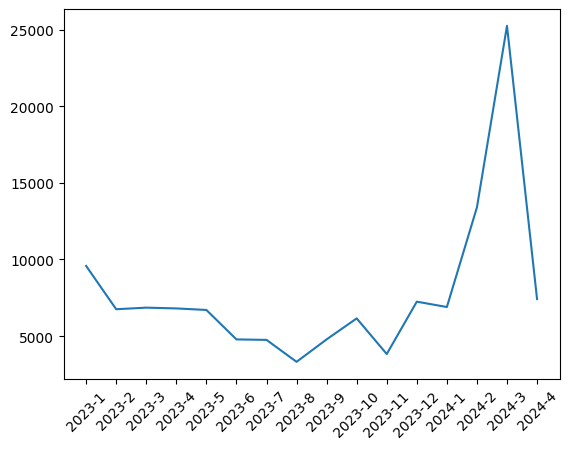

In [19]:
plt.plot(monthly_sales['year_month'], monthly_sales['material_1_kg'])
plt.xticks(rotation=45)

In [20]:
x_ = monthly_sales[:-3]
y_ = monthly_sales[-3:]

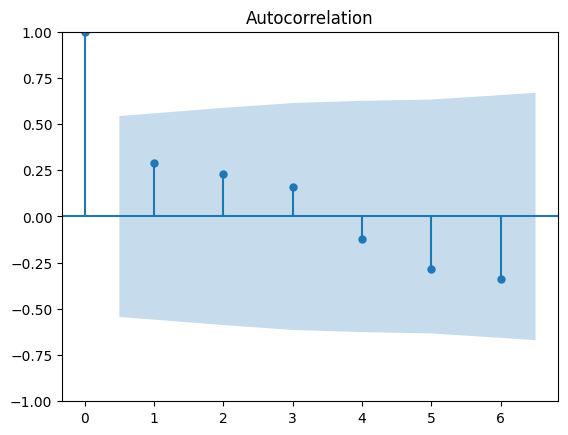

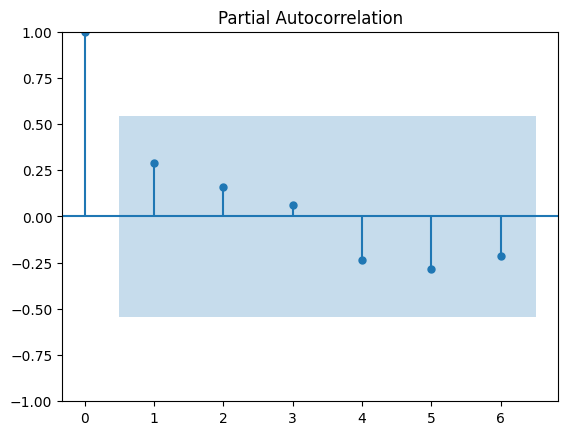

In [21]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
acf_og = plot_acf(x_['material_1_kg'])
pacf_og = plot_pacf(x_['material_1_kg'])

In [22]:
from statsmodels.tsa.stattools import adfuller
adf_test = adfuller(x_['material_1_kg'])
print(f'p-value: {adf_test[1]}')

p-value: 0.6765599217570011


<Axes: >

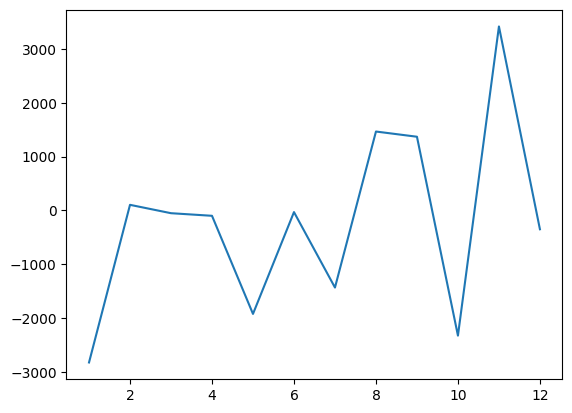

In [23]:
x__diff = x_['material_1_kg'].diff().dropna()
x__diff.plot()

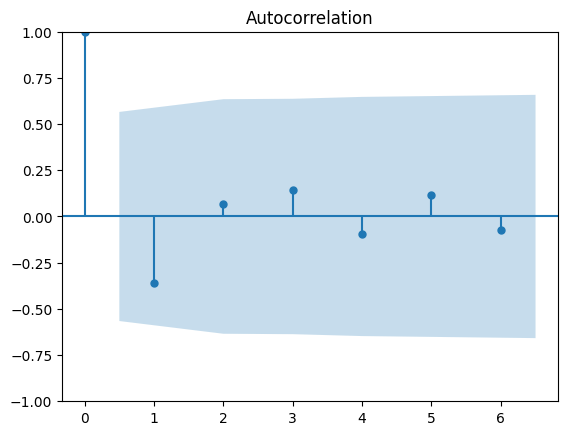

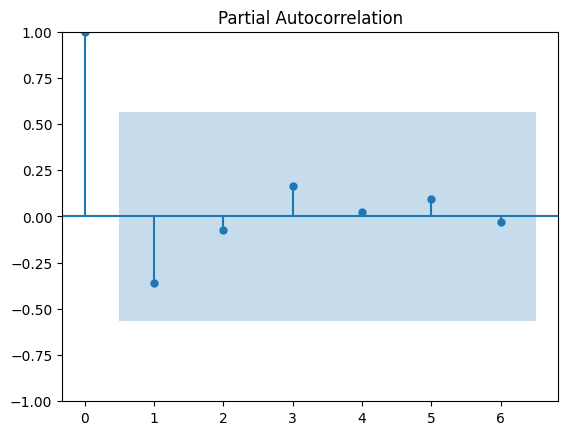

In [24]:
acf_diff = plot_acf(x__diff)
pacf_diff = plot_pacf(x__diff)

In [25]:
adf_test1 = adfuller(x__diff)
print(f'p-value: {adf_test1[1]}')

p-value: 1.849123102294515e-05


In [26]:
from statsmodels.tsa.arima.model import ARIMA
np_x = np.asarray(x_['material_1_kg'])
model = ARIMA(np_x, order = (0,1,0))
model_fit = model.fit()
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   13
Model:                 ARIMA(0, 1, 0)   Log Likelihood                -106.338
Date:                Tue, 21 May 2024   AIC                            214.675
Time:                        18:09:54   BIC                            215.160
Sample:                             0   HQIC                           214.496
                                 - 13                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      2.899e+06   1.36e+06      2.135      0.033    2.37e+05    5.56e+06
Ljung-Box (L1) (Q):                   1.97   Jarque-Bera (JB):                 0.37
Prob(Q):                              0.16   Pr

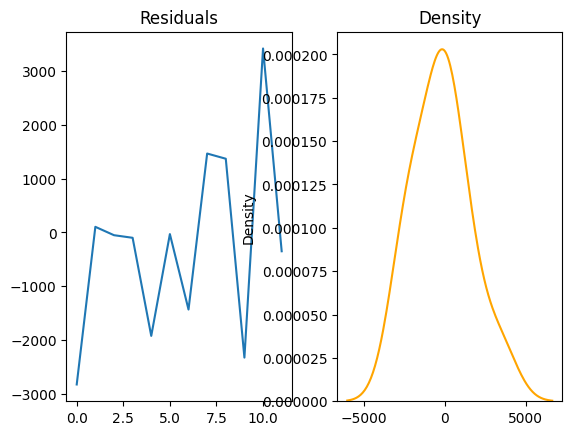

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns
residuals = model_fit.resid[1:]
fig, ax = plt.subplots(1, 2)
ax[0].plot(residuals)
ax[0].set_title('Residuals')
sns.kdeplot(residuals, ax=ax[1], color='orange')
ax[1].set_title('Density')
plt.show()

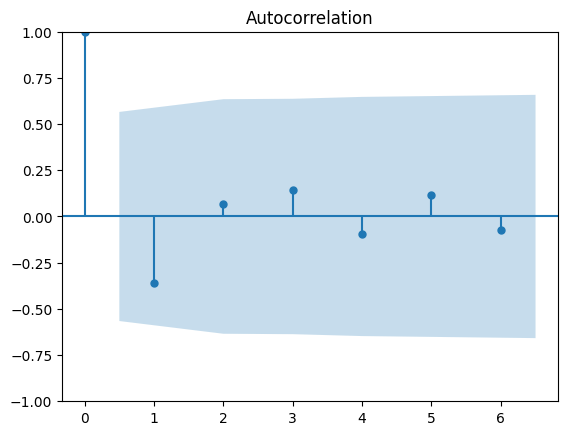

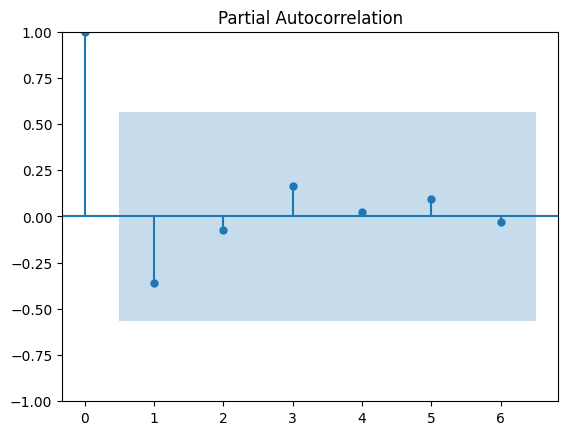

In [28]:
acf_res = plot_acf(residuals)
pacf_res = plot_pacf(residuals)

<Axes: >

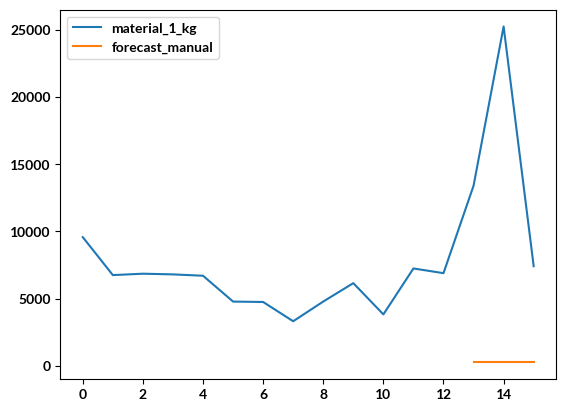

In [305]:
forecast_test = model_fit.forecast(len(y_))
monthly_sales['forecast_manual'] = [None]*len(x_) + list(forecast_test)
monthly_sales[['material_1_kg', 'forecast_manual']].plot()

In [306]:
import pmdarima as pm
auto_arima = pm.auto_arima(x_['material_1_kg'], stepwise = False, seasonal = True)
auto_arima

ARIMA(order=(0, 0, 0), scoring_args={}, seasonal_order=(0, 0, 0, 1),
      suppress_warnings=True)

In [327]:
import statsmodels.api as sm
model3 = sm.tsa.statespace.SARIMAX(monthly_sales['material_1_kg'], order = (0,1,0), seasonal_order = (0,1,0,12)) #third video, seasonality included
resBOPP30 = model3.fit()

<Axes: >

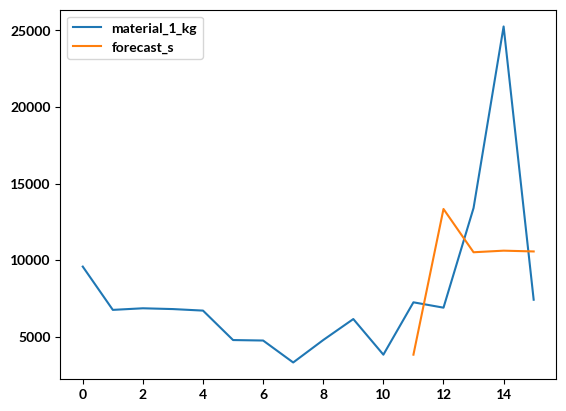

In [328]:
monthly_sales['forecast_s'] = resBOPP30.predict(start =11, end = 15, dynamic = True)
monthly_sales[['material_1_kg', 'forecast_s']].plot()

In [329]:
forecast_periods = 5
forecasts = resBOPP30.forecast(steps=forecast_periods)
forecasts

16    7316.3
17    5394.3
18    5363.5
19    3931.1
20    5396.6
Name: predicted_mean, dtype: float64

In [330]:
from pandas.tseries.offsets import DateOffset
monthly_sales['year_month'] = pd.to_datetime(monthly_sales['year_month'], format='%Y-%m')
last_date = monthly_sales['year_month'].max()
future_dates = [last_date + DateOffset(months=i) for i in range(1, 6)]
future_dates

[Timestamp('2024-05-01 00:00:00'),
 Timestamp('2024-06-01 00:00:00'),
 Timestamp('2024-07-01 00:00:00'),
 Timestamp('2024-08-01 00:00:00'),
 Timestamp('2024-09-01 00:00:00')]

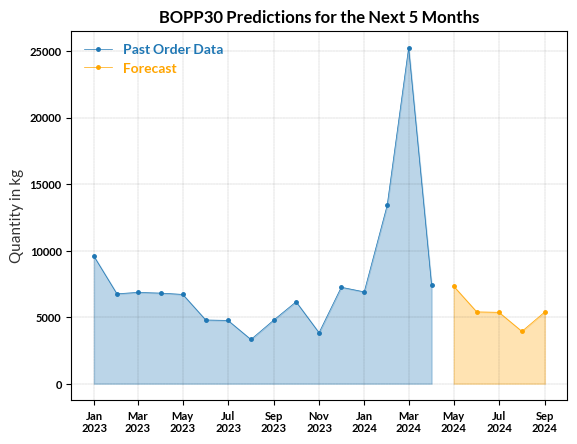

In [331]:
plt.plot(monthly_sales['year_month'], monthly_sales['material_1_kg'], label='Past Order Data', color = '#1f77b4', marker='o', markersize = 2.5, linewidth = 0.5)
plt.plot(future_dates, forecasts, label='Forecast',  color = 'orange', marker='o', markersize = 2.5, linewidth = 0.5)
plt.rc('font', family='Lato', weight='bold')
plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%b\n%Y'))
plt.gca().tick_params(axis='x', colors='black', labelsize = 8)
plt.gca().tick_params(axis='y', colors='black', labelsize = 8)
from matplotlib import font_manager
font_path = "C:/Users/HP/Downloads/Lato/Lato-Bold.ttf"
font_manager.fontManager.addfont(font_path)
plt.rcParams['font.family'] = 'Lato'
font1 = {'family': 'Lato',
        'color':  'grey',
        'weight': 'bold',
        'size': 11,
        }
font2 = {'family': 'Lato',
        'color':  'black',
        'weight': 'bold',
        'size': 12,
        }
plt.fill_between(monthly_sales['year_month'], monthly_sales['material_1_kg'], color='#1f77b4', alpha=0.3)
plt.fill_between(future_dates, forecasts, color='orange', alpha=0.3)
plt.xlabel("", color = 'grey')
plt.ylabel('Quantity in kg', color = '#333333', size = 11)
plt.grid(color='black', linestyle='--', linewidth=0.1)
plt.title('BOPP30 Predictions for the Next 5 Months', fontdict = font2)
plt.legend(frameon=False, labelcolor=['#1f77b4', 'orange'])
plt.savefig("BOPP30.png")

In [332]:
FileLink(r'BOPP30.png')

C:\Users\HP\BOPP30.png

In [71]:
forecast_df = pd.DataFrame({'Month': future_dates, 'Forecast': forecasts})
forecast_df

,Month,Forecast
16,2024-05-01,7316.3
17,2024-06-01,5394.3
18,2024-07-01,5363.5
19,2024-08-01,3931.1
20,2024-09-01,5396.6


In [37]:
#PET 12

In [38]:
pattern = re.compile('.*PET.*12.*')
db_PET_12 = db4[db4['material_1'].apply(lambda x: bool(re.search(pattern, str(x))))]
db_PET_12

,wo_date,material_1,material_1_kg,micron
0,2023-05-14,PET 12,57.00,42.0
1,2024-03-04,PET 12,26.95,62.0
219,2023-03-12,PET TP 12,100.00,62.0
563,2023-08-08,PET TP 12,41.60,82.0
565,2023-08-12,PET TP 12,26.95,62.0
592,2023-08-29,PET 12,55.10,42.0
606,2023-09-05,PET TP 12,55.10,42.0
607,2023-09-05,PET TP 12,54.00,62.0
608,2023-09-05,PET TP 12,13.78,42.0
619,2023-09-09,PET 12,82.70,42.0


In [39]:
db_model_PET_12 = db_PET_12[['wo_date', 'material_1_kg']]
db_model_PET_12

,wo_date,material_1_kg
0,2023-05-14,57.00
1,2024-03-04,26.95
219,2023-03-12,100.00
563,2023-08-08,41.60
565,2023-08-12,26.95
592,2023-08-29,55.10
606,2023-09-05,55.10
607,2023-09-05,54.00
608,2023-09-05,13.78
619,2023-09-09,82.70


In [40]:
db_model_PET_12['wo_date'] = pd.to_datetime(db_model_PET_12['wo_date'])

C:\Users\HP\AppData\Local\Temp\ipykernel_20616\1806847599.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  db_model_PET_12['wo_date'] = pd.to_datetime(db_model_PET_12['wo_date'])


In [41]:
db_model_PET_12['month'] = db_model_PET_12['wo_date'].dt.month
db_model_PET_12['year'] = db_model_PET_12['wo_date'].dt.year

C:\Users\HP\AppData\Local\Temp\ipykernel_20616\647056928.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  db_model_PET_12['month'] = db_model_PET_12['wo_date'].dt.month


In [42]:
monthly_salesPET = db_model_PET_12.groupby(['year', 'month'])['material_1_kg'].sum().reset_index()
monthly_salesPET

,year,month,material_1_kg
0,2023,3,100.00
1,2023,5,57.00
2,2023,8,123.65
3,2023,9,356.94
4,2023,10,194.80
5,2023,11,389.76
6,2023,12,236.40
7,2024,1,162.83
8,2024,2,924.86
9,2024,3,80.85


In [43]:
monthly_salesPET['year_month'] = monthly_salesPET['year'].astype(str) + '-' + monthly_salesPET['month'].astype(str)
monthly_salesPET

,year,month,material_1_kg,year_month
0,2023,3,100.00,2023-3
1,2023,5,57.00,2023-5
2,2023,8,123.65,2023-8
3,2023,9,356.94,2023-9
4,2023,10,194.80,2023-10
5,2023,11,389.76,2023-11
6,2023,12,236.40,2023-12
7,2024,1,162.83,2024-1
8,2024,2,924.86,2024-2
9,2024,3,80.85,2024-3


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, '2023-3'),
  Text(1, 0, '2023-5'),
  Text(2, 0, '2023-8'),
  Text(3, 0, '2023-9'),
  Text(4, 0, '2023-10'),
  Text(5, 0, '2023-11'),
  Text(6, 0, '2023-12'),
  Text(7, 0, '2024-1'),
  Text(8, 0, '2024-2'),
  Text(9, 0, '2024-3')])

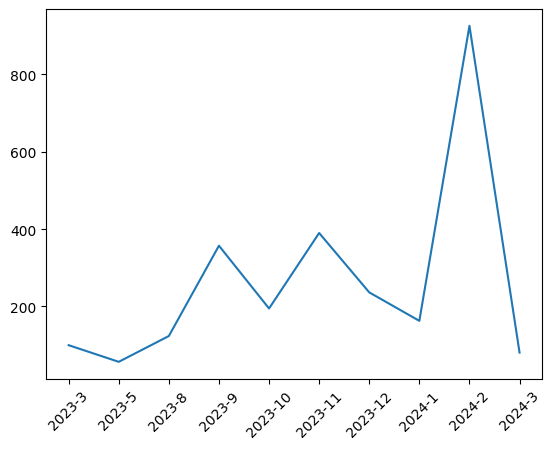

In [44]:
plt.plot(monthly_salesPET['year_month'], monthly_salesPET['material_1_kg'])
plt.xticks(rotation=45)

In [45]:
x_PET = monthly_salesPET[:-2]
y_PET = monthly_salesPET[-2:]

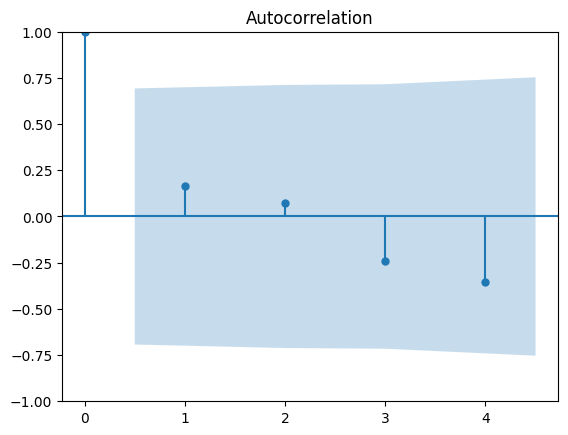

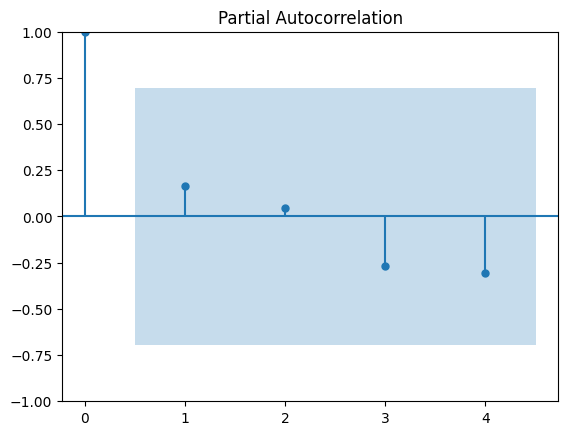

In [46]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
acf_PET = plot_acf(x_PET['material_1_kg'])
pacf_PET = plot_pacf(x_PET['material_1_kg'])

In [47]:
from statsmodels.tsa.stattools import adfuller
adf_test = adfuller(x_PET['material_1_kg'])
print(f'p-value: {adf_test[1]}')

p-value: 0.28339394716196165


<Axes: >

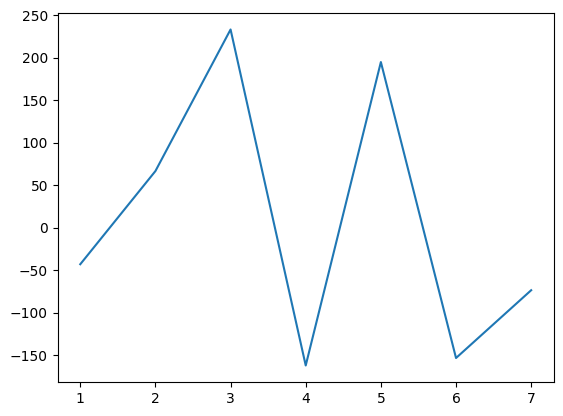

In [48]:
x__diff_PET = x_PET['material_1_kg'].diff().dropna()
x__diff_PET.plot()

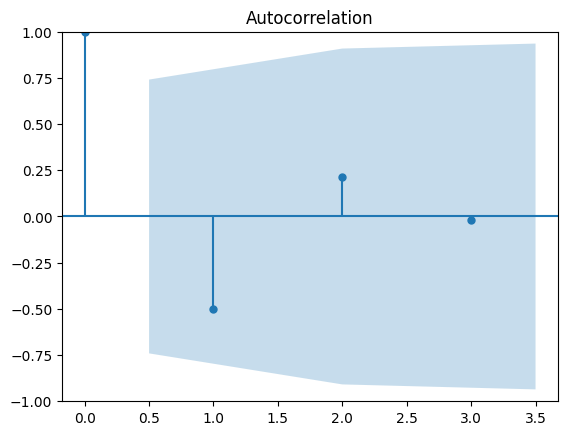

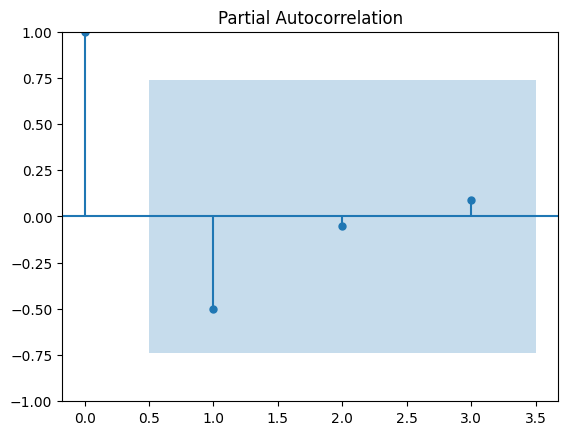

In [49]:
acf_diff = plot_acf(x__diff_PET)
pacf_diff = plot_pacf(x__diff_PET)

In [50]:
adf_test1 = adfuller(x__diff_PET)
print(f'p-value: {adf_test1[1]}')

p-value: 0.00675712174617172


In [51]:
from statsmodels.tsa.arima.model import ARIMA
np_x_PET = np.asarray(x_PET['material_1_kg'])
model = ARIMA(np_x_PET, order = (0,1,0))
model_fit = model.fit()
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                    8
Model:                 ARIMA(0, 1, 0)   Log Likelihood                 -44.927
Date:                Tue, 21 May 2024   AIC                             91.854
Time:                        18:11:06   BIC                             91.800
Sample:                             0   HQIC                            91.186
                                  - 8                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      2.199e+04   2.01e+04      1.095      0.274   -1.74e+04    6.14e+04
Ljung-Box (L1) (Q):                   2.65   Jarque-Bera (JB):                 0.72
Prob(Q):                              0.10   Pr

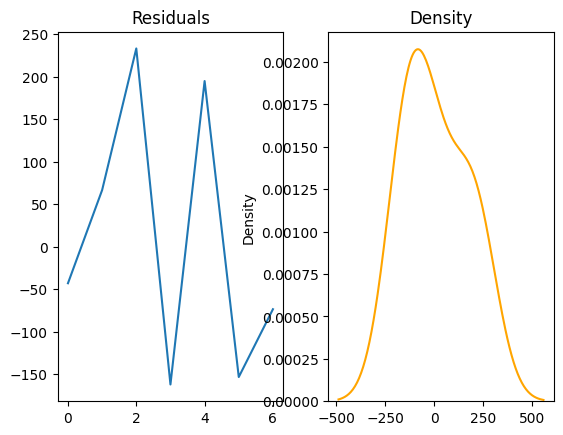

In [52]:
import matplotlib.pyplot as plt
import seaborn as sns
residuals = model_fit.resid[1:]
fig, ax = plt.subplots(1, 2)
ax[0].plot(residuals)
ax[0].set_title('Residuals')
sns.kdeplot(residuals, ax=ax[1], color='orange')
ax[1].set_title('Density')
plt.show()

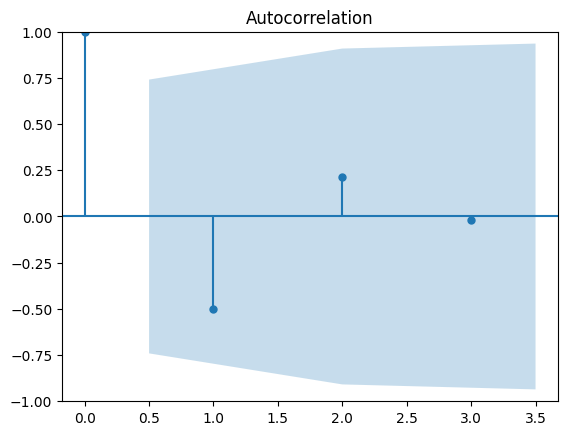

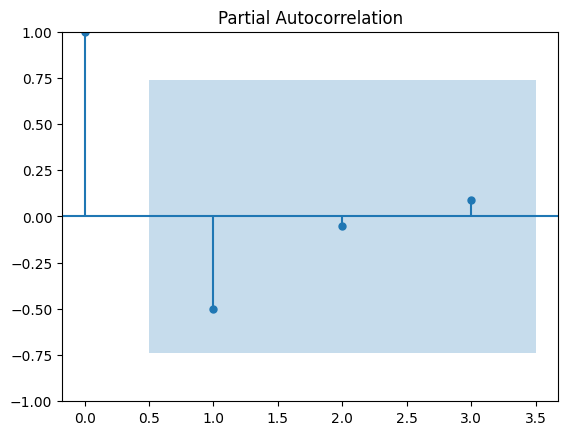

In [53]:
acf_res = plot_acf(residuals)
pacf_res = plot_pacf(residuals)

<Axes: >

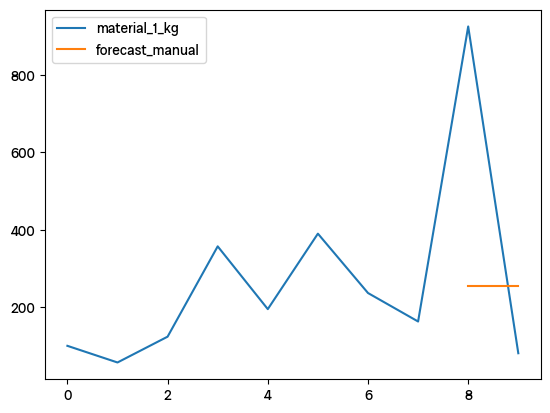

In [178]:
forecast_test = model_fit.forecast(len(y_PET))
monthly_salesPET['forecast_manual'] = [None]*len(x_PET) + list(forecast_test)
monthly_salesPET[['material_1_kg', 'forecast_manual']].plot()

In [315]:
import statsmodels.api as sm
model_PET = sm.tsa.statespace.SARIMAX(monthly_salesPET['material_1_kg'], order = (0,1,0), seasonal_order = (0,1,0,12)) #third video, seasonality included
resPET12 = model_PET.fit()

<Axes: >

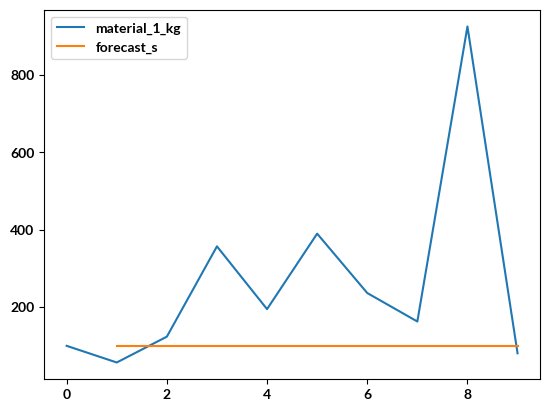

In [316]:
monthly_salesPET['forecast_s'] = resPET12.predict(start = 1, end = 9, dynamic = True)
monthly_salesPET[['material_1_kg', 'forecast_s']].plot()

In [317]:
forecast_periods = 5
forecasts = resPET12.forecast(steps=forecast_periods)
forecasts

10     80.85
11     80.85
12    130.85
13     87.85
14    154.50
Name: predicted_mean, dtype: float64

In [318]:
from pandas.tseries.offsets import DateOffset
monthly_salesPET['year_month'] = pd.to_datetime(monthly_salesPET['year_month'], format='%Y-%m')
last_date = monthly_salesPET['year_month'].max()
future_dates = [last_date + DateOffset(months=i) for i in range(1, 6)]
future_dates

[Timestamp('2024-04-01 00:00:00'),
 Timestamp('2024-05-01 00:00:00'),
 Timestamp('2024-06-01 00:00:00'),
 Timestamp('2024-07-01 00:00:00'),
 Timestamp('2024-08-01 00:00:00')]

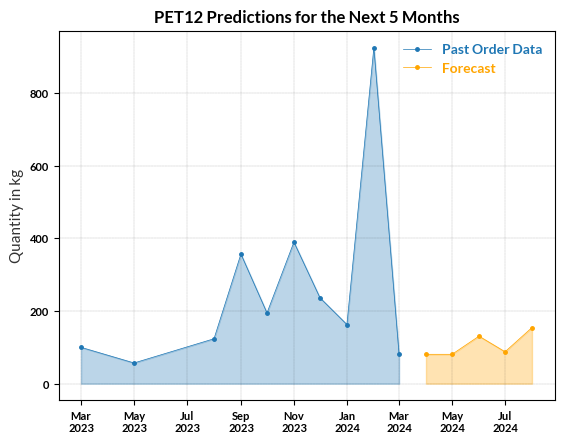

In [324]:
from matplotlib.font_manager import FontProperties
plt.plot(monthly_salesPET['year_month'], monthly_salesPET['material_1_kg'], label='Past Order Data', color = '#1f77b4', marker='o', markersize = 2.5, linewidth = 0.5)
plt.plot(future_dates, forecasts, label='Forecast', color = 'orange', marker='o', markersize = 2.5, linewidth = 0.5)
plt.rc('font', family='Lato', weight='bold')
plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%b\n%Y'))
plt.gca().tick_params(axis='x', colors='black', labelsize = 8)
plt.gca().tick_params(axis='y', colors='black', labelsize = 8)
from matplotlib import font_manager
font_path = "C:/Users/HP/Downloads/Lato/Lato-Bold.ttf"
font_manager.fontManager.addfont(font_path)
plt.rcParams['font.family'] = 'Lato'
font1 = {'family': 'Lato',
        'color':  'grey',
        'weight': 'bold',
        'size': 11,
        }
font2 = {'family': 'Lato',
        'color':  'black',
        'weight': 'bold',
        'size': 12,
        }
plt.fill_between(monthly_salesPET['year_month'], monthly_salesPET['material_1_kg'], color='#1f77b4', alpha=0.3)
plt.fill_between(future_dates, forecasts, color='orange', alpha=0.3)
plt.xlabel("", color = 'grey')
plt.ylabel('Quantity in kg', color = '#333333', size = 11)
plt.grid(color='black', linestyle='--', linewidth=0.1)
plt.title('PET12 Predictions for the Next 5 Months', fontdict = font2)
plt.legend(frameon=False, labelcolor=['#1f77b4', 'orange'])
plt.savefig("PET12.png")

In [325]:
from IPython.display import FileLink
FileLink(r'PET12.png')

C:\Users\HP\PET12.png

In [65]:
forecast_df_PET = pd.DataFrame({'Month': future_dates, 'Forecast': forecasts})
forecast_df_PET

,Month,Forecast
10,2024-04-01,80.85
11,2024-05-01,80.85
12,2024-06-01,130.85
13,2024-07-01,87.85
14,2024-08-01,154.50


In [126]:
#PREDICTING CPP50

In [82]:
pattern = re.compile('.*CPP.*50.*')
db_CPP_50 = db4[db4['material_2'].apply(lambda x: bool(re.search(pattern, str(x))))]
db_CPP_50

,wo_date,material_1,material_1_kg,material_2,material_2_kg,micron
1,2024-03-04,PET 12,26.95,CPP 50,73.05,62.0
219,2023-03-12,PET TP 12,100.00,CPP TP 50,100.00,62.0
565,2023-08-12,PET TP 12,26.95,CPP TP 50,73.04,62.0
607,2023-09-05,PET TP 12,54.00,CPP MET 50,146.00,62.0
648,2023-09-24,PET TP 12,53.90,CPP TP 50,146.10,62.0
651,2023-09-25,PET TP 12,40.43,CPP MET TP 50,109.57,62.0
684,2023-10-04,PET TP 12,26.90,CPP TP 50,73.04,62.0
701,2023-10-09,PET TP 12,53.90,CPP MET 50,146.00,62.0
765,2023-11-08,PET TP 12,40.43,CPP MET 50,109.50,62.0
766,2023-11-08,PET TP 12,40.43,CPP MET 50,109.50,62.0


In [84]:
db_model_CPP_50 = db_CPP_50[['wo_date', 'material_2_kg']]
db_model_CPP_50

,wo_date,material_2_kg
1,2024-03-04,73.05
219,2023-03-12,100.00
565,2023-08-12,73.04
607,2023-09-05,146.00
648,2023-09-24,146.10
651,2023-09-25,109.57
684,2023-10-04,73.04
701,2023-10-09,146.00
765,2023-11-08,109.50
766,2023-11-08,109.50


In [85]:
db_model_CPP_50['wo_date'] = pd.to_datetime(db_model_CPP_50['wo_date'])

C:\Users\HP\AppData\Local\Temp\ipykernel_20616\2380586058.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  db_model_CPP_50['wo_date'] = pd.to_datetime(db_model_CPP_50['wo_date'])


In [86]:
db_model_CPP_50['month'] = db_model_CPP_50['wo_date'].dt.month
db_model_CPP_50['year'] = db_model_CPP_50['wo_date'].dt.year

C:\Users\HP\AppData\Local\Temp\ipykernel_20616\496097113.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  db_model_CPP_50['month'] = db_model_CPP_50['wo_date'].dt.month
C:\Users\HP\AppData\Local\Temp\ipykernel_20616\496097113.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  db_model_CPP_50['year'] = db_model_CPP_50['wo_date'].dt.year


In [88]:
monthly_salesCPP50 = db_model_CPP_50.groupby(['year', 'month'])['material_2_kg'].sum().reset_index()
monthly_salesCPP50

,year,month,material_2_kg
0,2023,3,100.00
1,2023,8,73.04
2,2023,9,401.67
3,2023,10,219.04
4,2023,11,438.20
5,2023,12,219.20
6,2024,1,328.70
7,2024,2,730.40
8,2024,3,219.15


In [89]:
monthly_salesCPP50['year_month'] = monthly_salesCPP50['year'].astype(str) + '-' + monthly_salesCPP50['month'].astype(str)
monthly_salesCPP50

,year,month,material_2_kg,year_month
0,2023,3,100.00,2023-3
1,2023,8,73.04,2023-8
2,2023,9,401.67,2023-9
3,2023,10,219.04,2023-10
4,2023,11,438.20,2023-11
5,2023,12,219.20,2023-12
6,2024,1,328.70,2024-1
7,2024,2,730.40,2024-2
8,2024,3,219.15,2024-3


([0, 1, 2, 3, 4, 5, 6, 7, 8],
 [Text(0, 0, '2023-3'),
  Text(1, 0, '2023-8'),
  Text(2, 0, '2023-9'),
  Text(3, 0, '2023-10'),
  Text(4, 0, '2023-11'),
  Text(5, 0, '2023-12'),
  Text(6, 0, '2024-1'),
  Text(7, 0, '2024-2'),
  Text(8, 0, '2024-3')])

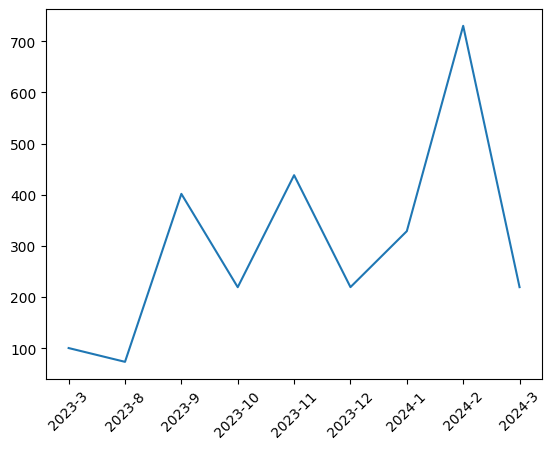

In [90]:
plt.plot(monthly_salesCPP50['year_month'], monthly_salesCPP50['material_2_kg'])
plt.xticks(rotation=45)

In [91]:
x_CPP50 = monthly_salesCPP50[:-2]
y_CPP50 = monthly_salesCPP50[-2:]

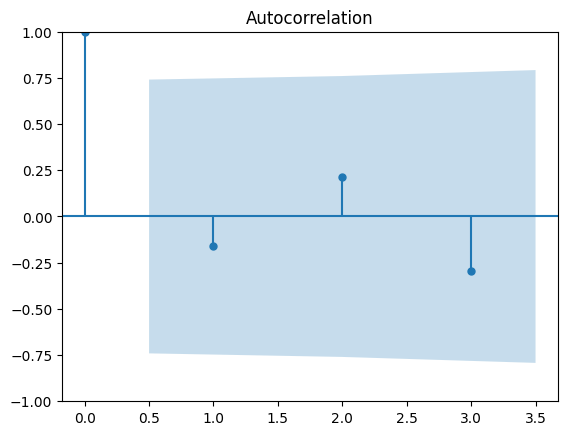

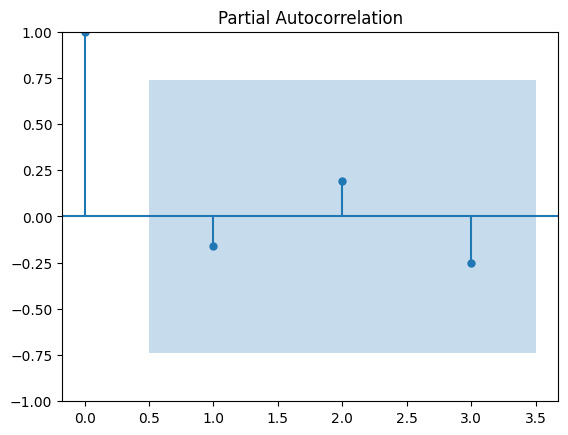

In [92]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
acf_CPP50 = plot_acf(x_CPP50['material_2_kg'])
pacf_CPP50 = plot_pacf(x_CPP50['material_2_kg'])

In [93]:
from statsmodels.tsa.stattools import adfuller
adf_test = adfuller(x_CPP50['material_2_kg'])
print(f'p-value: {adf_test[1]}')

p-value: 0.09306298238347882


In [120]:
from statsmodels.tsa.arima.model import ARIMA
np_x_CPP50 = np.asarray(x_CPP50['material_2_kg'])
model = ARIMA(np_x_CPP50, order = (0,0,0))
model_fit_CPP50 = model.fit()
print(model_fit_CPP50.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                    7
Model:                          ARIMA   Log Likelihood                 -44.061
Date:                Tue, 21 May 2024   AIC                             92.123
Time:                        20:00:46   BIC                             92.015
Sample:                             0   HQIC                            90.786
                                  - 7                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        254.2643     49.536      5.133      0.000     157.176     351.353
sigma2      1.717e+04   1.68e+04      1.021      0.307   -1.58e+04    5.01e+04
Ljung-Box (L1) (Q):                   0.28   Jarque-

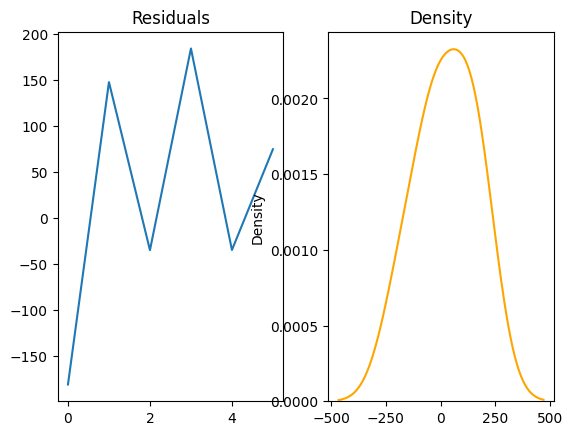

In [110]:
import matplotlib.pyplot as plt
import seaborn as sns
residuals = model_fit.resid[1:]
fig, ax = plt.subplots(1, 2)
ax[0].plot(residuals)
ax[0].set_title('Residuals')
sns.kdeplot(residuals, ax=ax[1], color='orange')
ax[1].set_title('Density')
plt.show()

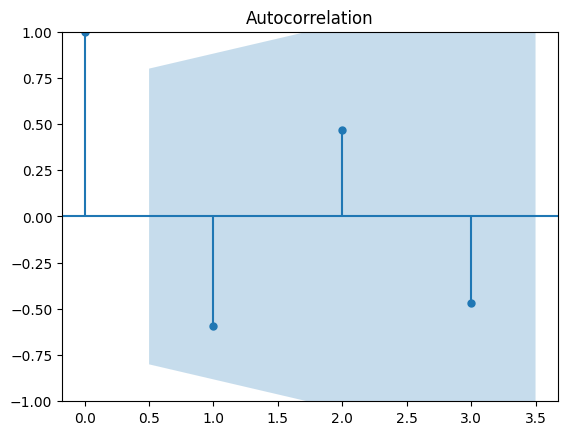

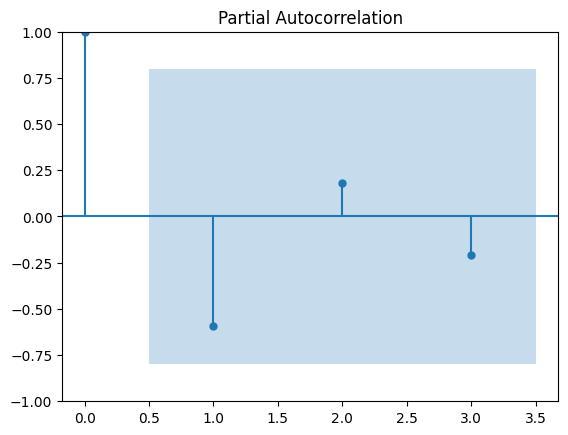

In [111]:
acf_res = plot_acf(residuals)
pacf_res = plot_pacf(residuals)

<Axes: >

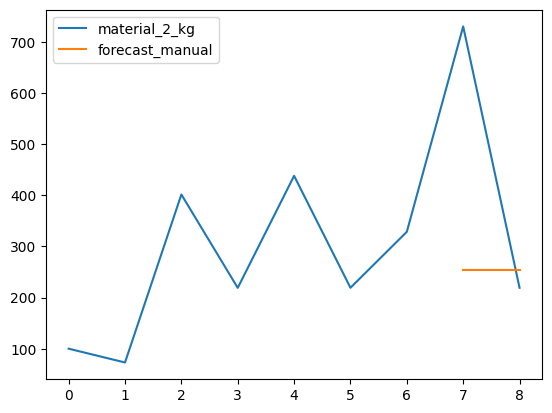

In [121]:
forecast_test = model_fit_CPP50.forecast(len(y_CPP50))
monthly_salesCPP50['forecast_manual'] = [None]*len(x_CPP50) + list(forecast_test)
monthly_salesCPP50[['material_2_kg', 'forecast_manual']].plot()

In [122]:
import statsmodels.api as sm
model_CPP50 = sm.tsa.statespace.SARIMAX(monthly_salesCPP50['material_2_kg'], order = (0,0,0), seasonal_order = (0,0,0,12)) #third video, seasonality included
resCPP50 = model_CPP50.fit()

<Axes: >

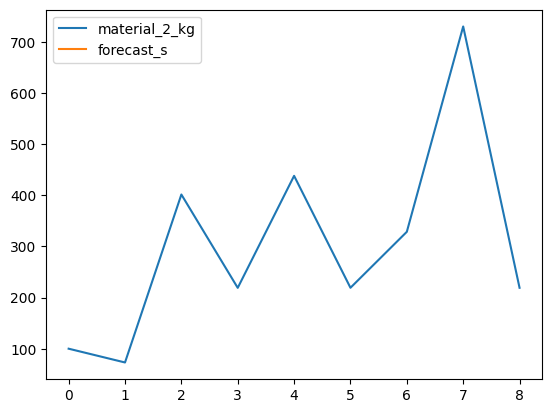

In [130]:
monthly_salesCPP50['forecast_s'] = resCPP50.predict(start = 9, end = 14, dynamic = True)
monthly_salesCPP50[['material_2_kg', 'forecast_s']].plot()

In [131]:
forecast_periods = 5
forecasts = resCPP50.forecast(steps=forecast_periods)
forecasts

9     0.0
10    0.0
11    0.0
12    0.0
13    0.0
Name: predicted_mean, dtype: float64

In [127]:
from pandas.tseries.offsets import DateOffset
monthly_salesCPP50['year_month'] = pd.to_datetime(monthly_salesCPP50['year_month'], format='%Y-%m')
last_date = monthly_salesCPP50['year_month'].max()
future_dates = [last_date + DateOffset(months=i+5) for i in range(1, 6)]
future_dates

[Timestamp('2024-09-01 00:00:00'),
 Timestamp('2024-10-01 00:00:00'),
 Timestamp('2024-11-01 00:00:00'),
 Timestamp('2024-12-01 00:00:00'),
 Timestamp('2025-01-01 00:00:00')]

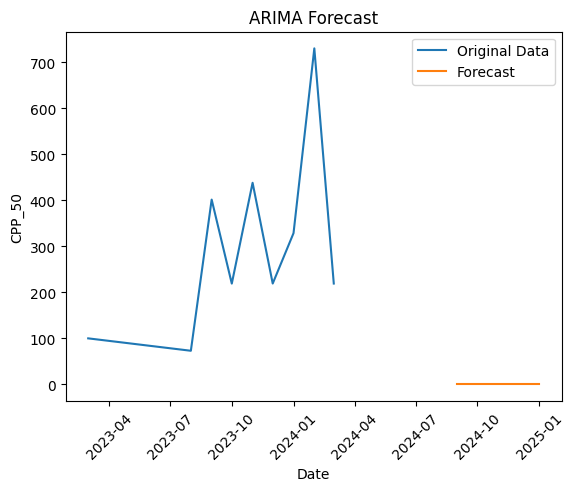

In [128]:
plt.plot(monthly_salesCPP50['year_month'], monthly_salesCPP50['material_2_kg'], label='Original Data')
plt.plot(future_dates, forecasts, label='Forecast')
plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%Y-%m'))
plt.xlabel('Date')
plt.ylabel('CPP_50')
plt.title('ARIMA Forecast')
plt.xticks(rotation=45)
plt.legend()

In [129]:
forecast_df_CPP_50 = pd.DataFrame({'Month': future_dates, 'Forecast': forecasts})
forecast_df_CPP_50

,Month,Forecast
9,2024-09-01,0.0
10,2024-10-01,0.0
11,2024-11-01,0.0
12,2024-12-01,0.0
13,2025-01-01,0.0


In [72]:
joblib.dump(resBOPP30, "model_BOPP30.pkl")

['model_BOPP30.pkl']

In [73]:
from IPython.display import FileLink
FileLink("model_BOPP30.pkl")

C:\Users\HP\model_BOPP30.pkl

In [74]:
joblib.dump(resPET12, "model_PET12.pkl")

['model_PET12.pkl']

In [75]:
FileLink("model_PET12.pkl")

C:\Users\HP\model_PET12.pkl

In [ ]:
#function defined for flask route
def pred(modelname):
    